<a href="https://colab.research.google.com/github/tkd8973/DeepLearning_SW/blob/main/tkd8973/Plant_Imload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# late submission
# https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7
!kaggle competitions download -c plant-pathology-2020-fgvc7 # kaggle.json? -> 403, late submission -> 401

Saving kaggle.json to kaggle.json
 98% 767M/779M [00:03<00:00, 255MB/s]
100% 779M/779M [00:03<00:00, 253MB/s]


In [4]:
!ls
!unzip plant-pathology-2020-fgvc7

'kaggle (1) (1).json'   plant-pathology-2020-fgvc7.zip
'kaggle (1).json'       sample_data
Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jp

In [5]:
!ls

 images		        plant-pathology-2020-fgvc7.zip	 test.csv
'kaggle (1) (1).json'   sample_data			 train.csv
'kaggle (1).json'       sample_submission.csv


In [6]:
import pandas as pd

# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')
# submission = pd.read_csv('sample_submission.csv')

# 데이터 경로 (Kaggle 대응)
data_path = './'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [7]:
train.shape, test.shape

((1821, 5), (1821, 1))

In [ ]:
train.head()
# image_id : 확장자가 없음 -> dataset 만들 때 추가
# healthy	multiple_diseases	rust	scab -> 0, 1 -> 원핫인코딩

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [ ]:
submission.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.25,0.25,0.25,0.25
1,Test_1,0.25,0.25,0.25,0.25
2,Test_2,0.25,0.25,0.25,0.25
3,Test_3,0.25,0.25,0.25,0.25
4,Test_4,0.25,0.25,0.25,0.25


# 데이터 시각화

## 타깃값 분포

In [16]:
# 데이터를 타깃값별로 추출
healthy = train.loc[train['healthy']==1]
healthy
multiple_diseases = train.loc[train['multiple_diseases']==1]


,image_id,healthy,multiple_diseases,rust,scab
2,Train_2,1,0,0,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
9,Train_9,1,0,0,0
13,Train_13,1,0,0,0
...,...,...,...,...,...
1808,Train_1808,1,0,0,0
1810,Train_1810,1,0,0,0
1814,Train_1814,1,0,0,0
1817,Train_1817,1,0,0,0


In [ ]:
train.columns.tolist()[1:]

['healthy', 'multiple_diseases', 'rust', 'scab']

In [23]:
healthy, multiple_diseases, rust, scab=[train.loc[train[col]==1] for col in train.columns.tolist()[1:]]

In [57]:
healthyvb  

,image_id,healthy,multiple_diseases,rust,scab
2,Train_2,1,0,0,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
9,Train_9,1,0,0,0
13,Train_13,1,0,0,0
...,...,...,...,...,...
1808,Train_1808,1,0,0,0
1810,Train_1810,1,0,0,0
1814,Train_1814,1,0,0,0
1817,Train_1817,1,0,0,0


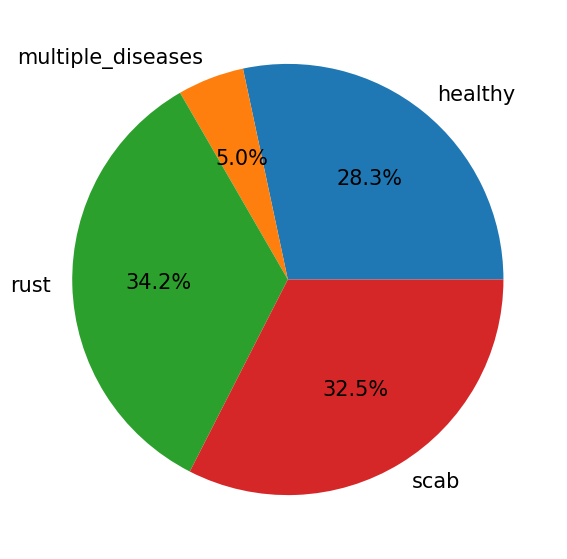

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

# label = train.columns.tolist()[1:]
label = ['healthy', 'multiple_diseases', 'rust', 'scab']
# 타깃값 분포 파이 그래프
plt.pie(
    [len(healthy), len(multiple_diseases), len(rust), len(scab)],
    labels = label,
    autopct = '%.1f%%' # 소수점 1째자리까지
)
plt.show()

## 이미지 출력

In [34]:
import matplotlib.gridspec as gridspec # 서브플롯 자동으로 배치
import cv2 # 이미지 불러오기

def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows * cols # 이미지가 행/열 개수보다 많으면 오류 발생
    # assert는 True면은 문제가 없고, False일 때 에러를 발생시킴

    # 전체 이미지 사이즈 설정
    plt.figure(figsize=(15,8))
    # 서브플롯 배치
    grid = gridspec.GridSpec(rows,cols)
    # 이미지 출력
    for idx, img_id in enumerate(img_ids):
        # 이미지 파일 [로
        path = f'images/{img_id}.jpg'
        # 이미지 파일 읽기
        img = cv2.imread(path)

        # 이미지 색상 보정
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # gridspec -> 서브플롯
        ax = plt.subplot(grid[idx])
        # 이미지 출력
        ax.imshow(img,'gray')
    plt.show()

In [48]:
# 각 타깃별 이미지 ID 6개 -> 출력
# 뒤에서 num_of_lmgs만큼의 갯수만큼 이미지 id를 추출
# def last_img(imgs):
    # return imgs['image_id'][-num_of_Imgs:]

num_of_lmgs = 6

last_img = lambda x:x['image_id'][-num_of_lmgs:]    

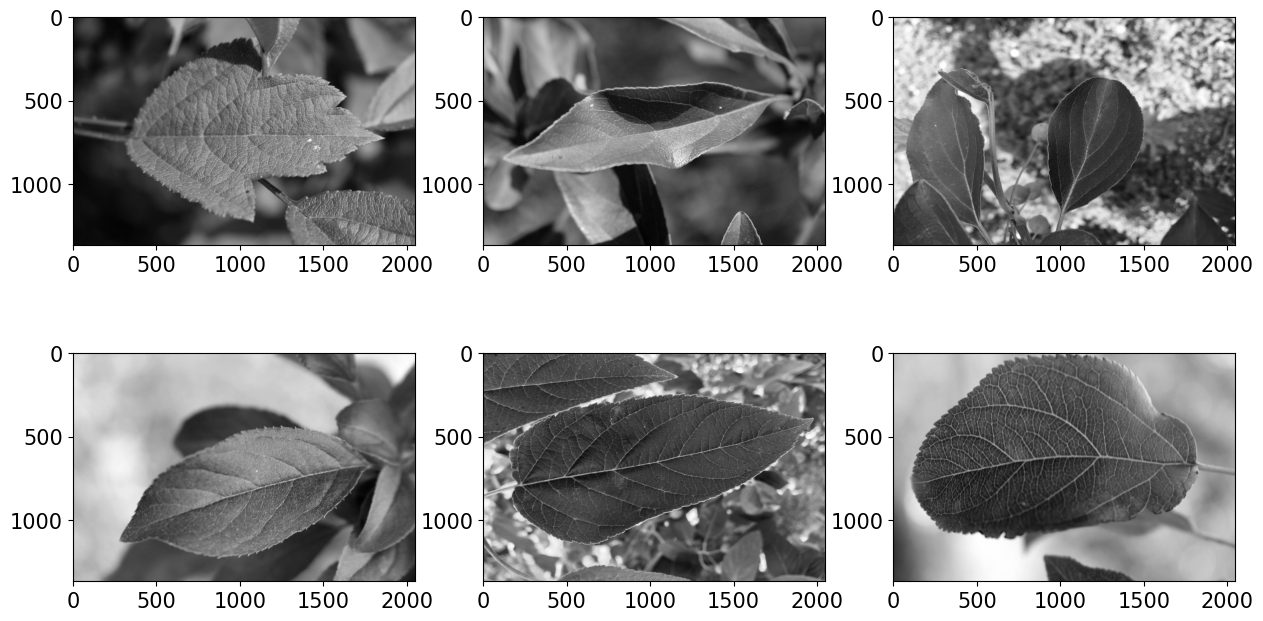

In [54]:
show_image(last_img(healthy)) # 건강한 잎사귀

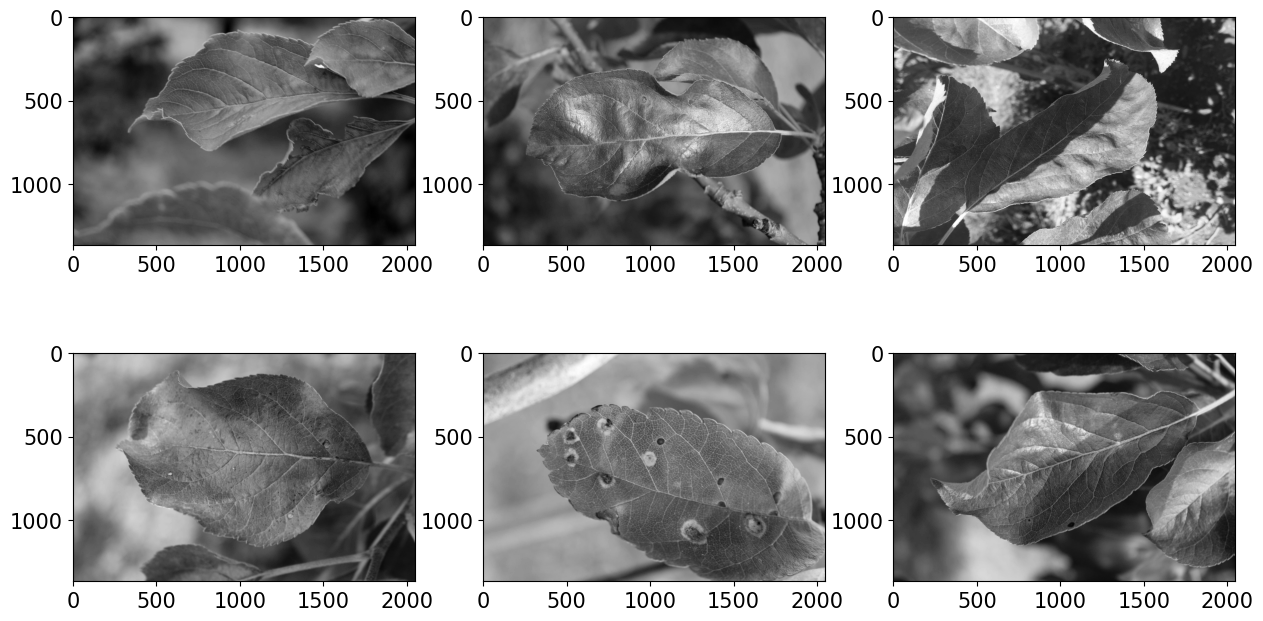

In [53]:
show_image(last_img(multiple_diseases)) # 여러 질병에 걸린 잎사귀

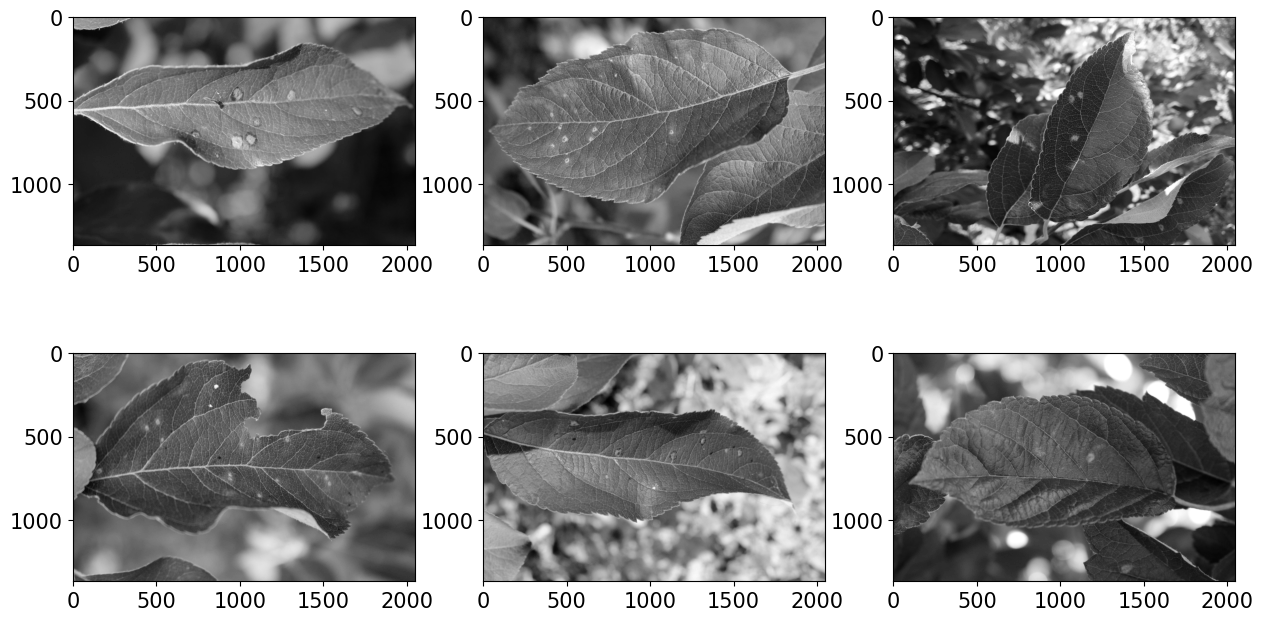

In [55]:
show_image(last_img(rust)) # 녹병에 걸린 잎사귀

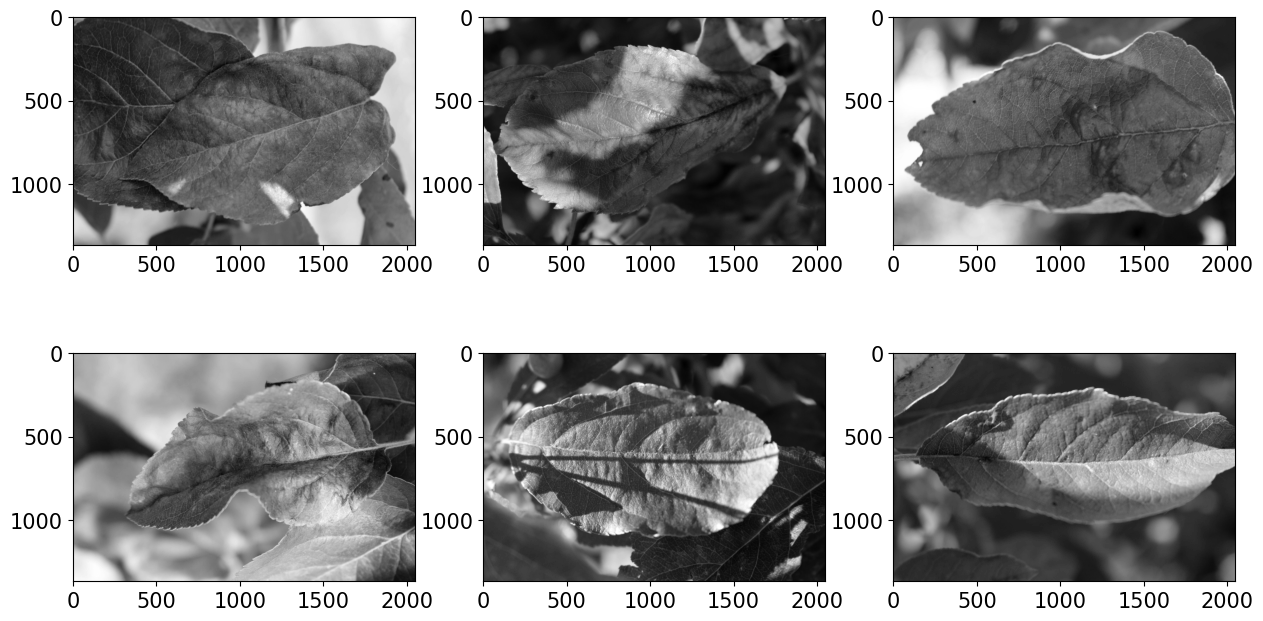

In [59]:
show_image(last_img(scab)) # 붉은곰팡이병에 걸린 잎사귀